# Data Analysis and Data Science
## Be curious about the method 

By: Caroline Labelle
<br>For: BIM6065-C

<br>
Date: July 4th, 2023

<hr style="border:1px solid black"> </hr>

In [1]:
### Student Name: Thomas Perreault

Complete the following exercises and submit your Notebook in a HTML format on StudiUM. You have until July 5th, noon to hand-in your Notebook.

In [2]:
### Import sklearn
import sklearn.decomposition, sklearn.cluster

### Import scipy
import scipy as sp

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white", palette="Set2")

## Genes correlation [25 pts]

In [4]:
### Import and clean the Gene expression cancer 1 dataset
data  = pd.read_csv("gene_expression_cancer_1.csv", sep=",", header=0)
data.head()

,ESR1,PGR,BCL2,NAT1,Results
0,5.1,3.5,1.4,0.2,Cured
1,4.9,3.0,1.4,0.2,Cured
2,4.7,3.2,1.3,0.2,Cured
3,4.6,3.1,1.5,0.2,Cured
4,5.0,3.6,1.4,0.2,Cured


### Global correlation [6 pts]

Pearson correlation:  -0.10936924995064938


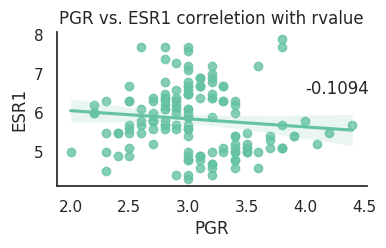

In [5]:
### Consider the PGR and ESR1 genes. Do the expression of these two genes correlates?
### Consider the entire dataset.
### Answer the question with a Pearson correlation coefficient, a plot and brief interpretation of your results.
reg = sp.stats.linregress(x=data.PGR, y=data.ESR1, alternative="two-sided")
print("Pearson correlation: ", reg.rvalue)

p = sns.regplot(data, x="PGR", y="ESR1")
p.text(4,6.5, np.round(reg.rvalue, 4))
p.set_title("PGR vs. ESR1 correletion with rvalue")

sns.despine()

In [6]:
print("Interpretation : ")
print("The linear correlation between the expression of ESR1 and PGR seems to be really weak at best")

Interpretation : 
The linear correlation between the expression of ESR1 and PGR seems to be really weak at best


### Grouped correlations [14 pts]

In [9]:
### Consider the same two genes, but assess correlation based on the patient outcomes (a.k.a "Results").
### For each group, return a Pearson correlation coefficient and a plot.
### (You can generate a single plot with all three groups or three individual plots)
### Briefly interpret your results and state if your conclusion differ from the one previously made (Global correlation).


#create subset



#subset_data = pd.DataFrame(data.loc[:, "ESR1":"PGR"])
#subset_data_Cured= data.loc[data.Results=="Cured", "ESR1":"PGR"] 
sub = data.loc[:, ["ESR1", "PGR", "Results"]]

sub_Cured = sub.loc[sub["Results"] == "Cured"]
sub_Cured.head()

sub_Recurrence = sub.loc[sub["Results"] == "Recurrence"]
sub_Recurrence.head()

sub_Dead = sub.loc[sub["Results"] == "Dead"]
sub_Dead.head()

#pd.DataFrame(data.loc[data.Results=="Cured", :], columns = data.columns)
#regCured = sp.stats.linregress(x=sub_Cured.PGR, y=sub_Cured.ESR1, alternative="two-sided")
#sub_Rec
#sub_Dead

#regCured = sp.stats.linregress(x=data.PGR.Results=="Cured", y=data.ESR1.Results=="Cured", alternative="two-sided")
#print(regCured)
#regReccurence = sp.stats.linregress(x=data.PGR, y=data.ESR1, alternative="two-sided")
#regDead = sp.stats.linregress(x=data.PGR, y=data.ESR1, alternative="two-sided")

#pl=sns.lmplot(data=data, x="ESR1", y="PGR", truncate=False, col="Results", hue="Results")
#sns.despine()
#pl.text(1,1, np.round())

,ESR1,PGR,Results
99,5.7,2.8,Dead
100,6.3,3.3,Dead
101,5.8,2.7,Dead
102,7.1,3.0,Dead
103,6.3,2.9,Dead


### Spearman's rank correlation [5 pts]

In [8]:
### Calculate the Spearman' rank correlations for the four comparisons made previously.
### (Global dataset and the three goups)
### Do the results differ? if so, do the conlusions also differ? 
### Briefly explain what are the new conclusions.
